<a href="https://colab.research.google.com/github/iamu985/LinearRegression-single_feature-housePrices-/blob/master/LinearRegression_housingPricesData__Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some important pieces of informations:

> The data included in this project is from Andrew Ng's machine learning course in Coursera. 



> This model tries to predict the prices of the house based on its size in square feet.







In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='darkgrid')

In [0]:
'''Defining all functions that we are going to use for  single feature linear regression'''

def vectorize(input_values, output_values):
    '''Converts the given parameters to vectors'''
    Xarr = np.array(input_values).reshape(len(input_values), 1)
    yarr = np.array(output_values).reshape(len(output_values), 1)
    return Xarr, yarr

def percentError (model, output_values):
    '''Calculates accuracy percent of the model'''
    prediction = (model-output_values)**2
    accuracy = prediction.mean() * 100
    return accuracy

def scale_features(data):
    '''scales the features size to comparable common range (-1,1)'''
    '''Xf = X - mean/ max-min'''
    '''Feature Scaling: x[i] = (x[i] - mu[i])/ s[i] where s[i] is maxm value - min value i.e range of the dataset'''
    mean = float(data.mean())
    scale = float(max(data) - min(data))
    il = []
    for i in data:
        i = (float(i) - mean)/scale
        il.append(i)
    array = np.array(il, dtype='float').reshape(len(il), 1)
    return array
  
def hypothesis(input_values, params):
    '''hypothesis(X) = theta*Xt'''
    parameters = np.array(params).reshape(len(params), 1)
    hypothesis = np.array(np.dot(parameters, input_values.transpose())[-1]).reshape(len(input_values), 1)
    return hypothesis

def mean_squared_error(model, output_values):
    '''mse = 1/2m * summation of (h(x) - y)**2'''
    constant = float(1/(2*len(output_values)))
    sum_squared_diff = float(sum((model - output_values)**2))
    mse = constant * sum_squared_diff
    return mse

def batch_gradient(input_values, output_values, params, alpha, iterations=15):
    '''theta(j) := theta(j) - alpha * deriv(costfunction)'''
    '''derivation: 2/m * summation of (h-y) X --- if theta is 0 X = 1'''
    parameters = np.array(params, dtype='float').reshape(len(params), 1)
    iters = 0
    mse = []
    constant = float(2/len(input_values))
    
    while iters < iterations:

        #calculating hypothesis and costfunction
        model = hypothesis(input_values, parameters)
        costfunction = mean_squared_error(model, output_values)
        mse.append(costfunction)
    
        #solving for derivatives 
        deriv0 = alpha * constant * float(sum(model-output_values))
        deriv1 = alpha * constant * float(sum((model-output_values) * input_values))

        #updating thetas
        parameters[0] = parameters[0] - deriv0
        parameters[1] = parameters[1] - deriv1

        #printing results
        if iterations <= 15:
          print(f'iterations: {iters}, costfunction: {costfunction}, theta0: {parameters[0]}, theta1: {parameters[1]}')
        iters+=1

    print('Computing-----Done---')
    
    return parameters, mse

def plots(xscat=None, yscat=None, xplot=None, yplot=None):
    fig, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(xscat, yscat)
    plt.plot(xplot, yplot)
    plt.show()
    
def scatter_plot(xscat, yscat):
    fig, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(xscat, yscat)
    plt.show()  

def lineplot(xplot):
    fig, ax = plt.subplots(figsize=(11, 9))
    plt.plot(xplot)
    plt.show()  


def tests(ins, outs, pars, init_cost, init_accuracy):
    model = hypothesis(ins, pars)
    costfunction = mean_squared_error(model, outs)
    accuracy = percentError(model, outs)
  
    #checks
    if costfunction == init_costfunction:
        print('costfunction: True')
    else:
        print('costfunction: False')
  
    if accuracy == init_accuracy:
        print('accuracy: True')
    else:
        print('accuracy: False')

    print(f'costfunction: {costfunction}, accuracy: {accuracy}')
  
    return model

After defining all the functions that we are about to use, I will be defining a loop to better enhance the efficiency; which is a fancy way of saying that I am too lazy to type and call the function each time. So the answer I will be calling all the functions once in a loop where my only task would be to enter the values from alpha (learning rate) and number of iterations.

In [0]:
def loop(input_values, output_values, init_params, init_costfunction, init_accuracy):
    active = True
    
    while active:
        iterations = int(input('Iterations: '))
        alpha = float(input('Alpha: '))
        #computing gradient descent 
        params, costs = batch_gradient(input_values, output_values, init_params, alpha, iterations)
        
        #tests
        print(f'Results for alpha  {alpha} for iterations {iterations}')
        model = tests(input_values, output_values, params, init_costfunction, init_accuracy)
        
        #plotting the graphs
        print('-' * 60)
        print('Scatter Plot')
        fig, ax = plt.subplots(figsize=(11, 9))
        plt.scatter(Xarr, yarr)
        print('-'*60)
        print('Model Plot')
        plots(Xarr, yarr, Xarr, model)
        print('-'*60)
        print('Cost Function  Plot')
        lineplot(costs)
        print('-'*60)
        print('Thats all the plots')
        
        usrcont = input('Continue: ')
        if usrcont == 'y':
            continue
        if usrcont == 'n':
            active = False
            
        
        

Now that I have all the functions that we need neatly and clearly defined, I will load my dataset of housing prices.

In [0]:
#loading dataset
filename = 'housing _prices_mlcourse.csv'
df = pd.read_csv(filename)
df.head()

,size(f^2),no.of bedrooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


As you can clearly see my dataset consists of 3 features size in feet square, number of bedrooms and prices. Now these features or labels are of different units. Which is to say they can't be compared as the data is right now. We have no idea how to compare 1600ft.sq. to 3 no. of bedrooms and 329900 USD. In order to compare these features side by side we have to scale it to a similar range so.

> But first lets see what results we will get if we pass the values straight from the dataset without feature scaling it. Now since this project is on Linear regression for single feature model I will be passing size of the house as my input feature omiting bedrooms feature. And if its not clear already prices will be my output values



In [0]:
#collecting labels
labels = df.columns
labels

Index(['size(f^2)', 'no.of bedrooms', 'price'], dtype='object')

These are my labels or features. In the above piece of code I am creating a list of all my features.

In [0]:
#creating vectorized vectors of input and output values
X, y = vectorize(df[labels[0]], df[labels[2]])

In [0]:
#creating initial parameters
init_params = [0, 0]

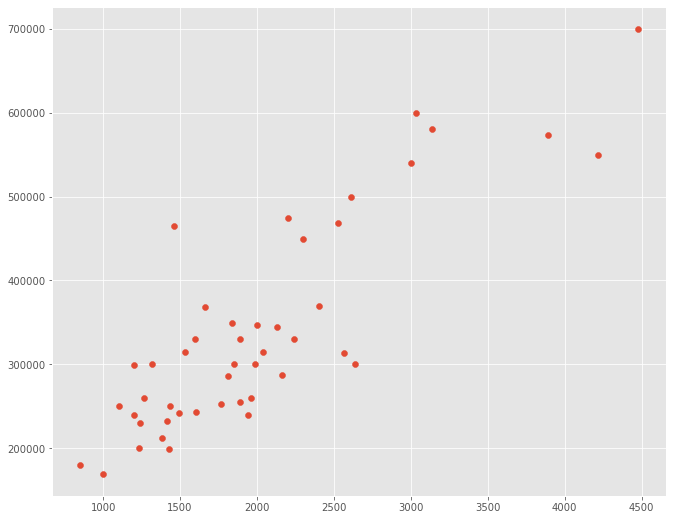

In [0]:
#dataset without  feature scaling
scatter_plot(X, y)

And here is how my dataset looks in a graph. Remember that this is a graph without feature scaling.

In [0]:
#without feature scaling intial model and costfunction
model = hypothesis(X, init_params)
cost = mean_squared_error(model, y)
cost

65279190347.902176

Whoa! The cost function is unbelievably high!!

In [0]:
#initial accuracy without feature scaling
accuracy = percentError(model, y)
accuracy

13055838069580.436

And the accuracy which should be in percent is very very very high!!

So, in order to improve our model, lets scale our feature to a comparable similar range.

In [0]:
#our input and output values after feature scaling
Xarr = scale_features(X)
yarr = scale_features(y)

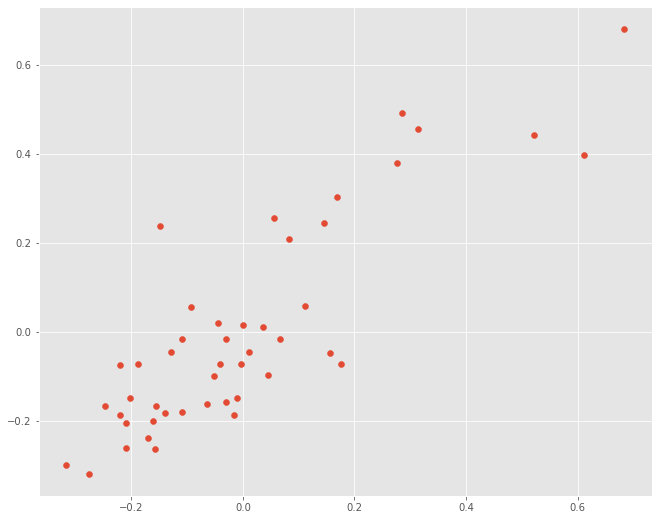

In [0]:
#dataset after feature scaling
scatter_plot(Xarr, yarr)

And here is how our dataset now look after scaling it. It isnt that different is it?

In [0]:
#costfunction and model after feature scaling
model = hypothesis(Xarr, init_params)
init_costfunction = mean_squared_error(model, yarr)
init_costfunction

0.027690236568537974

Wow, thats an improvement in our cost function than before.

In [0]:
#accuracy after feature scaling
init_accuracy = percentError(model, yarr)
init_accuracy

5.538047313707595

Our accuracy changed too... 5.53%... hmmm.. okay!

So lets use our loop function to get the best fit model for our dataset. Lets go!

Iterations: 16
Alpha: 0.0001
Computing-----Done---
Results for alpha  0.0001 for iterations 16
costfunction: False
accuracy: False
costfunction: 0.02768400342627388, accuracy: 5.536800685254778
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


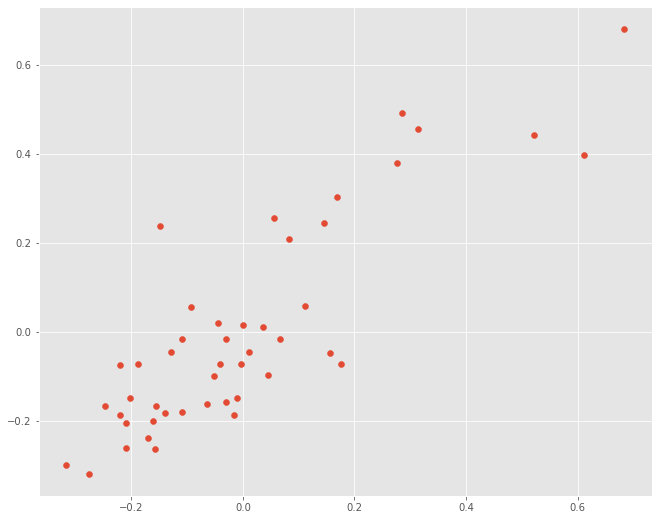

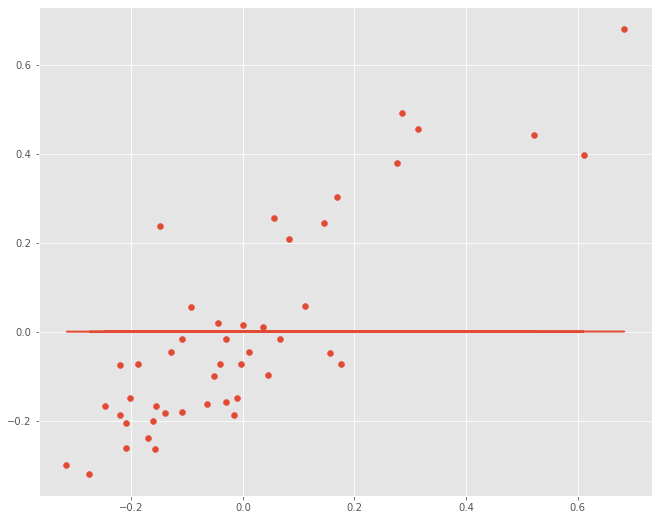

------------------------------------------------------------
Cost Function  Plot


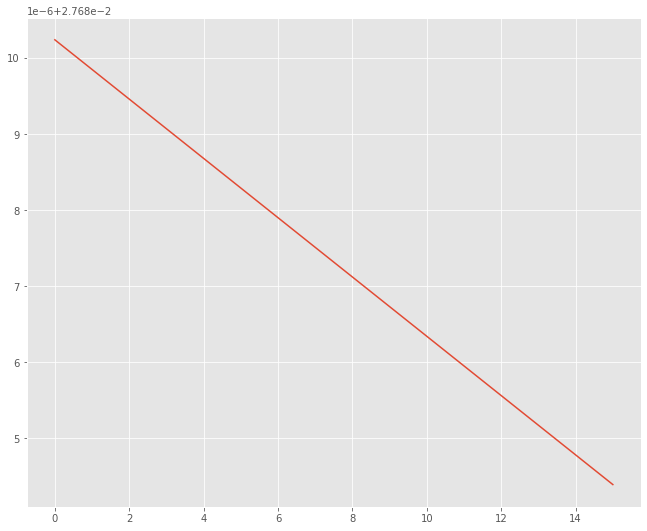

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 20
Alpha: 0.0005
Computing-----Done---
Results for alpha  0.0005 for iterations 20
costfunction: False
accuracy: False
costfunction: 0.027651310089921242, accuracy: 5.530262017984248
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


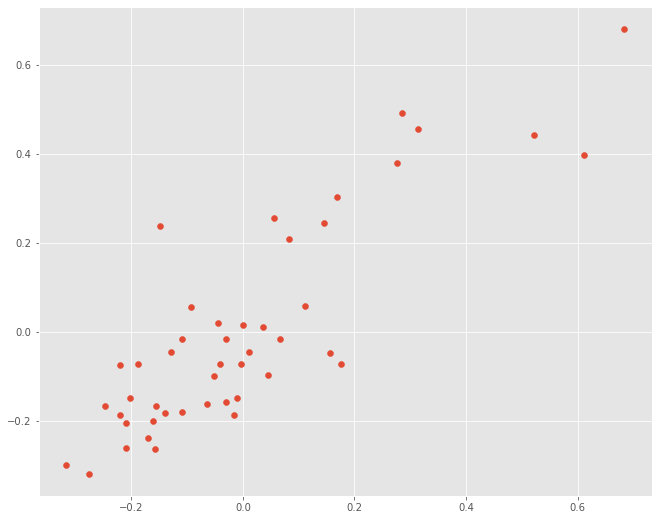

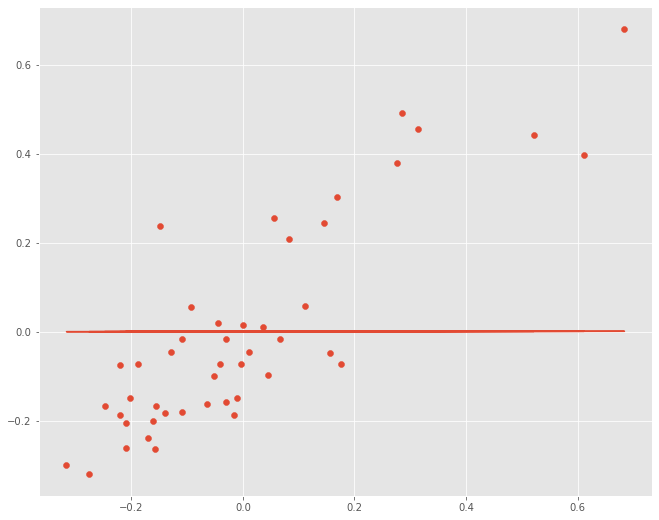

------------------------------------------------------------
Cost Function  Plot


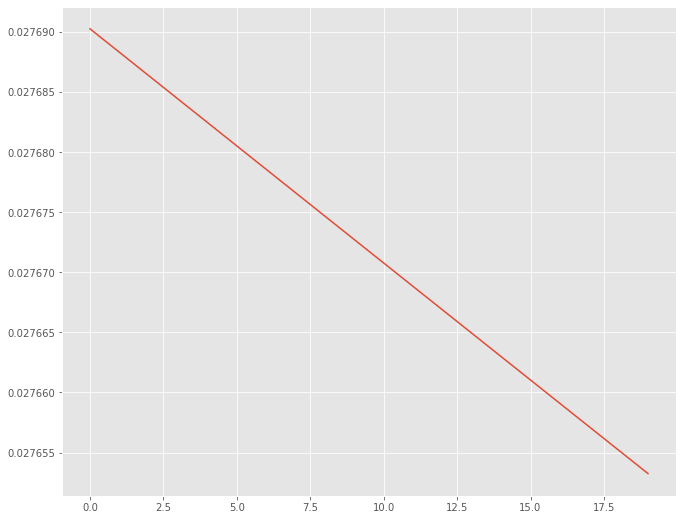

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 200
Alpha: 0.0009
Computing-----Done---
Results for alpha  0.0009 for iterations 200
costfunction: False
accuracy: False
costfunction: 0.027000859085156915, accuracy: 5.400171817031385
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


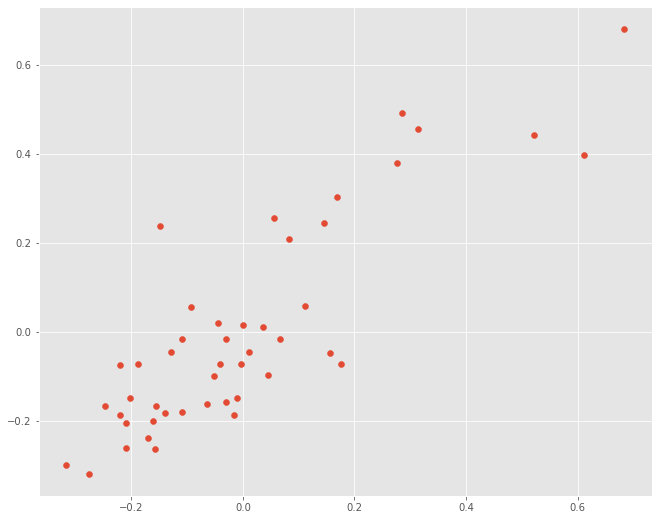

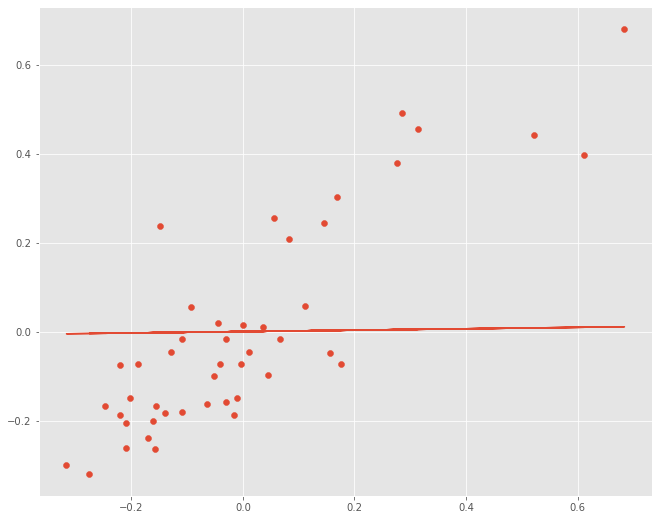

------------------------------------------------------------
Cost Function  Plot


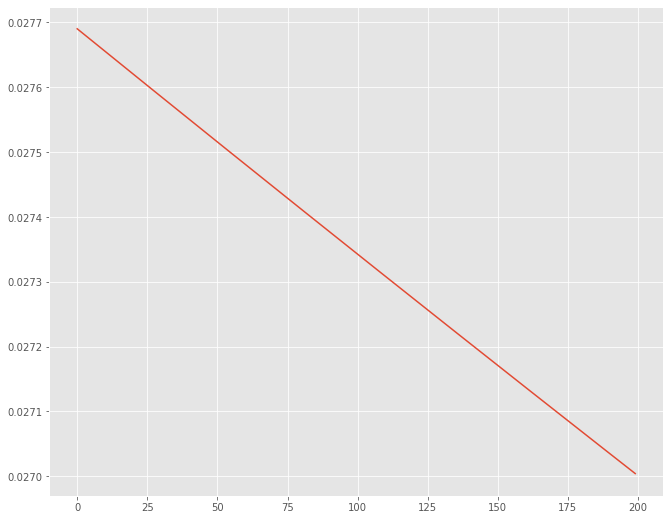

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1000
Alpha: 0.001
Computing-----Done---
Results for alpha  0.001 for iterations 1000
costfunction: False
accuracy: False
costfunction: 0.024145113137183694, accuracy: 4.82902262743674
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


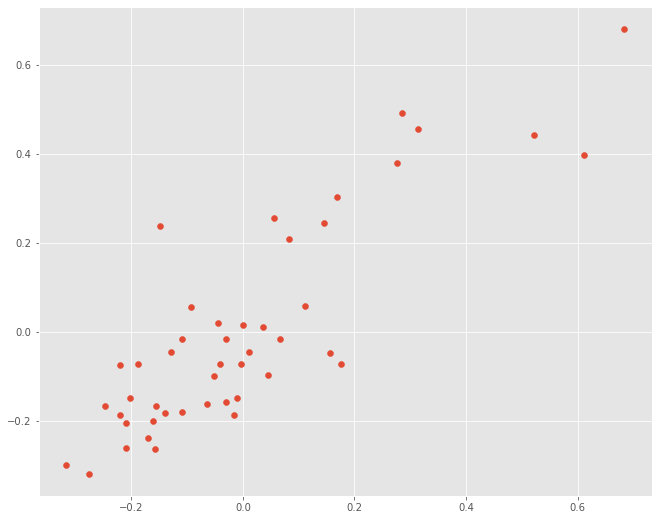

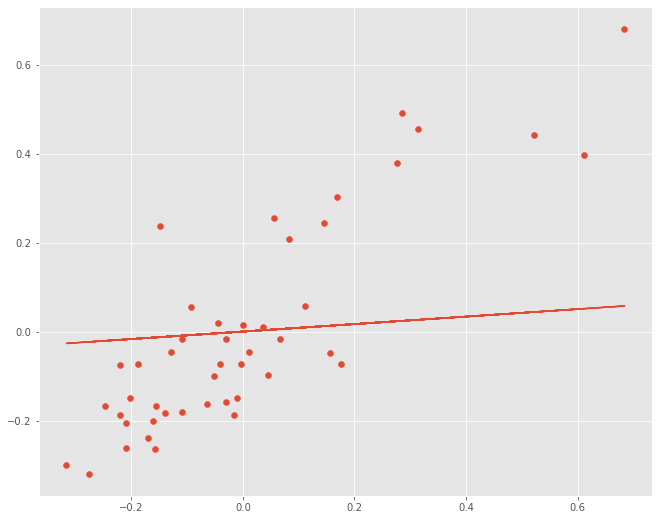

------------------------------------------------------------
Cost Function  Plot


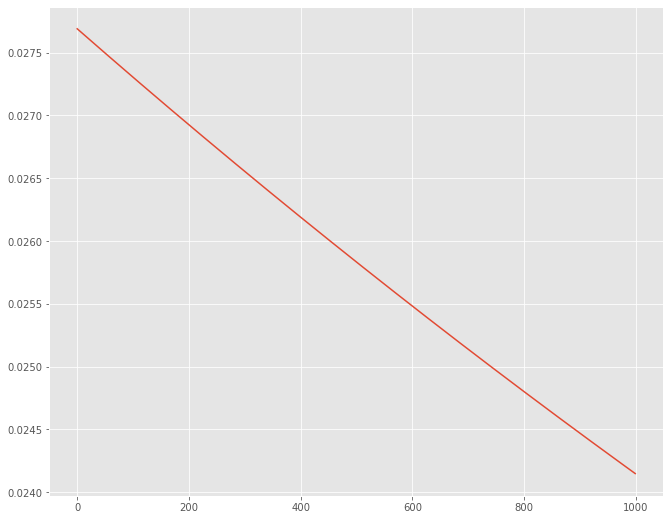

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1000
Alpha: 0.009
Computing-----Done---
Results for alpha  0.009 for iterations 1000
costfunction: False
accuracy: False
costfunction: 0.01100280900071952, accuracy: 2.2005618001439036
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


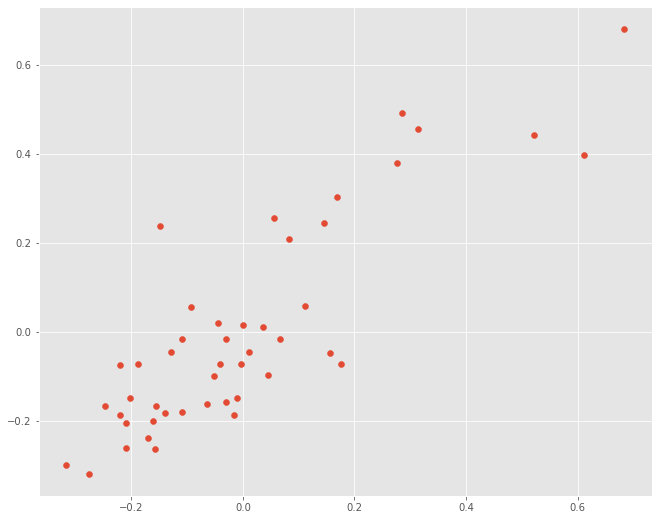

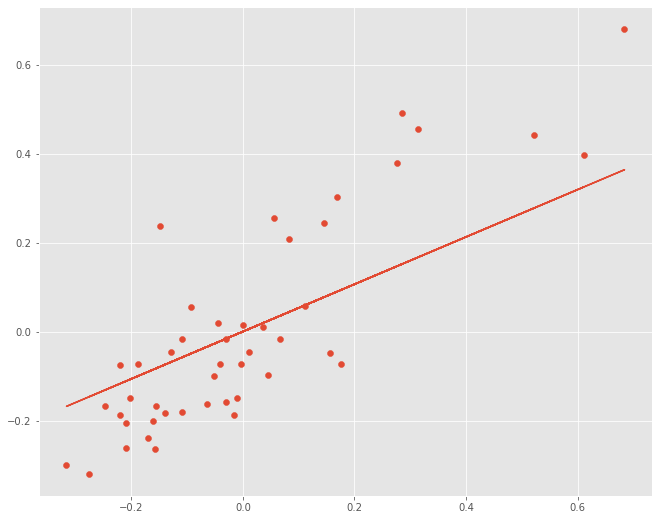

------------------------------------------------------------
Cost Function  Plot


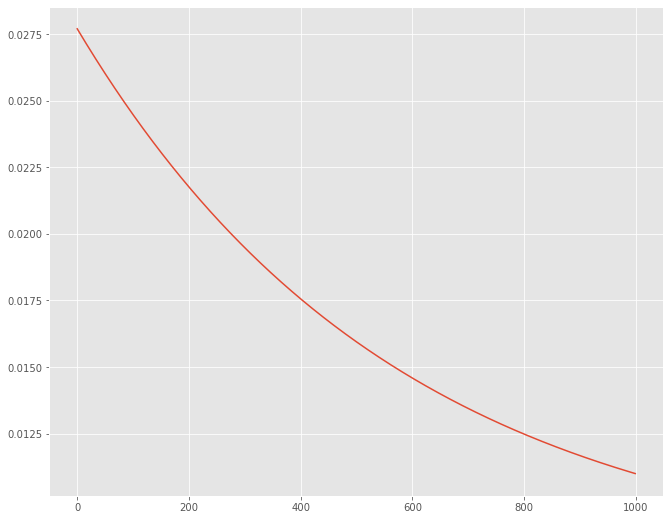

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.01
Computing-----Done---
Results for alpha  0.01 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.008540068173438014, accuracy: 1.7080136346876031
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


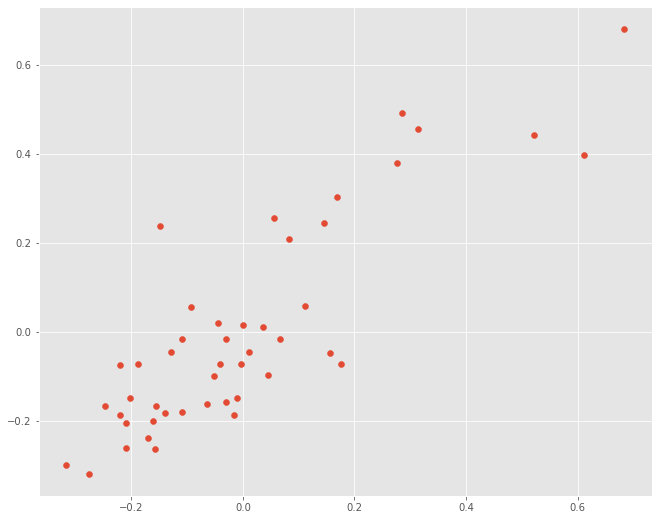

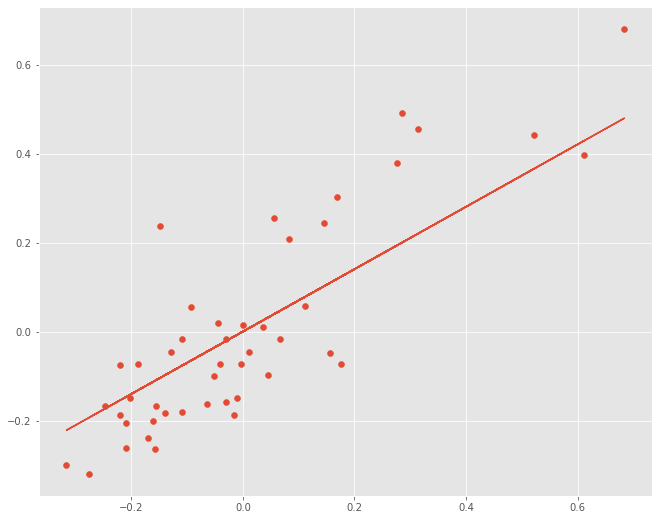

------------------------------------------------------------
Cost Function  Plot


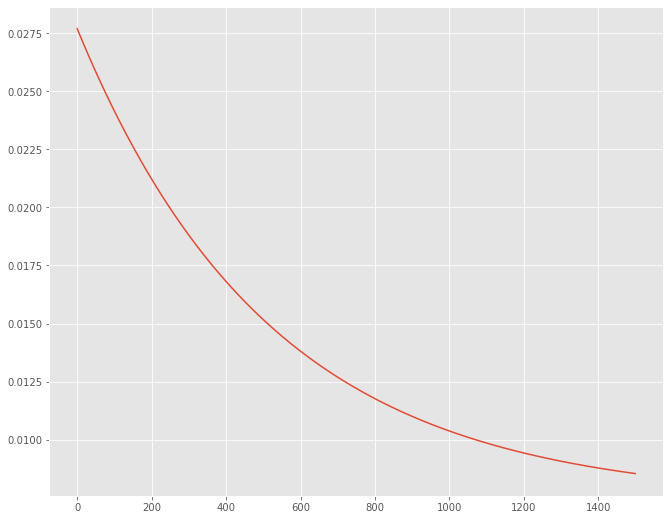

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.09
Computing-----Done---
Results for alpha  0.09 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.00740400446128051, accuracy: 1.4808008922561025
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


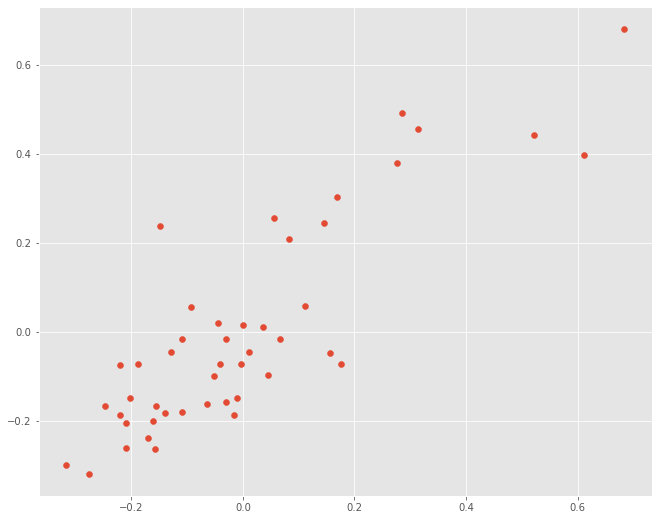

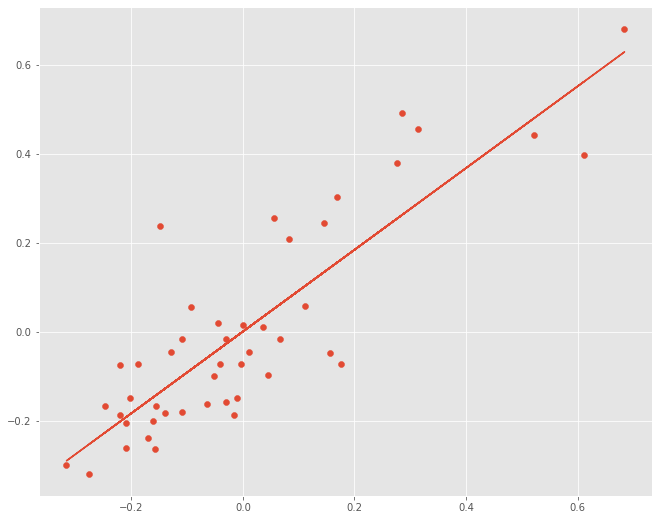

------------------------------------------------------------
Cost Function  Plot


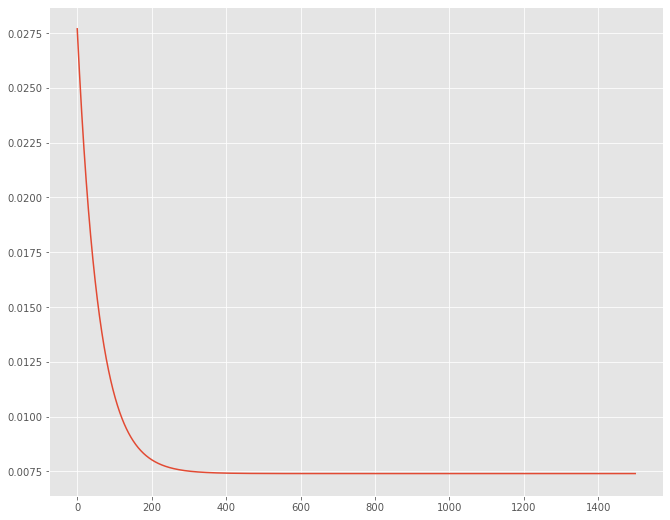

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.09
Computing-----Done---
Results for alpha  0.09 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.00740400446128051, accuracy: 1.4808008922561025
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


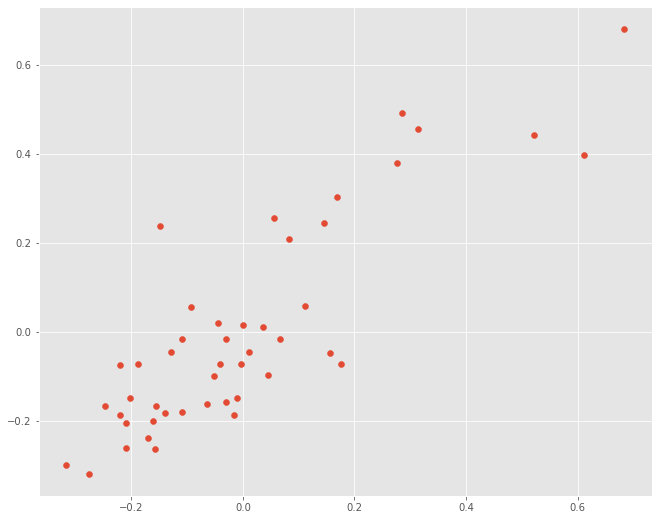

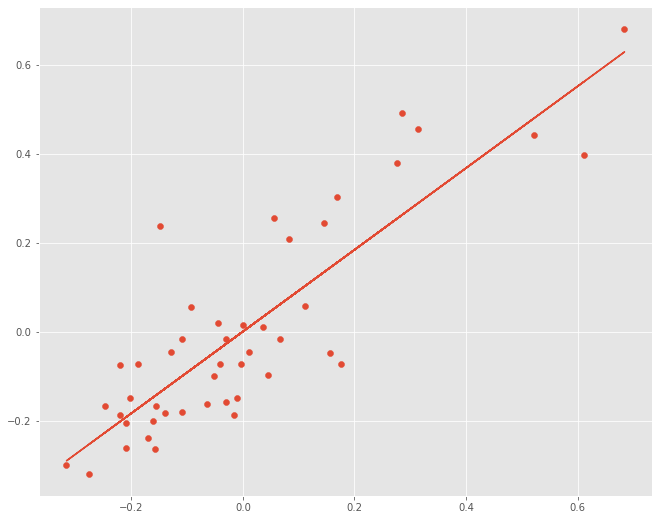

------------------------------------------------------------
Cost Function  Plot


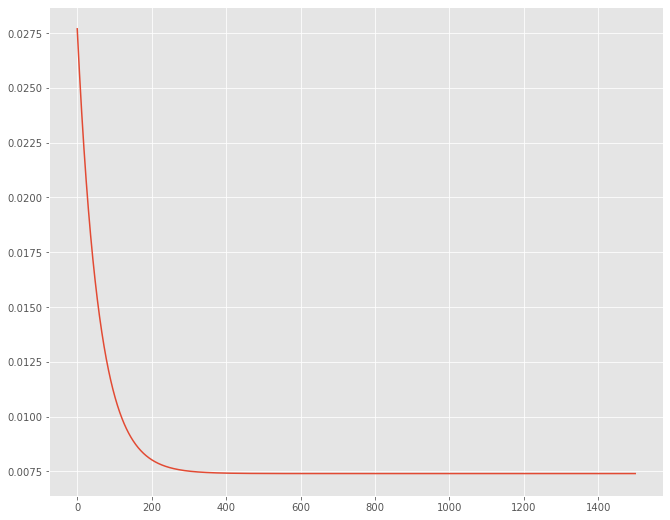

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.1
Computing-----Done---
Results for alpha  0.1 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.00740400446118652, accuracy: 1.4808008922373037
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


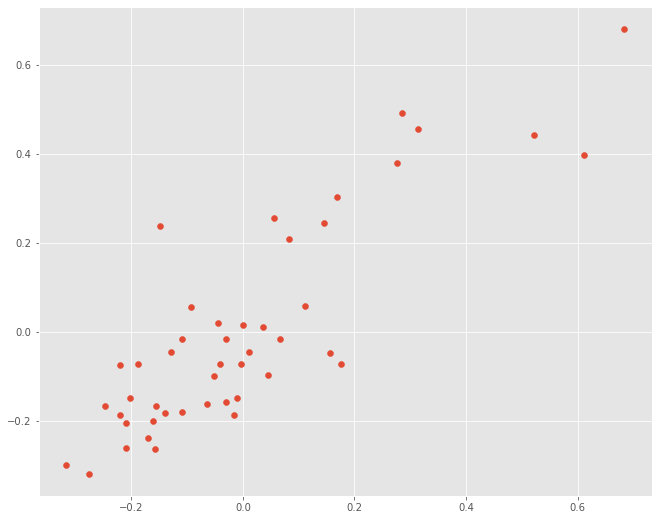

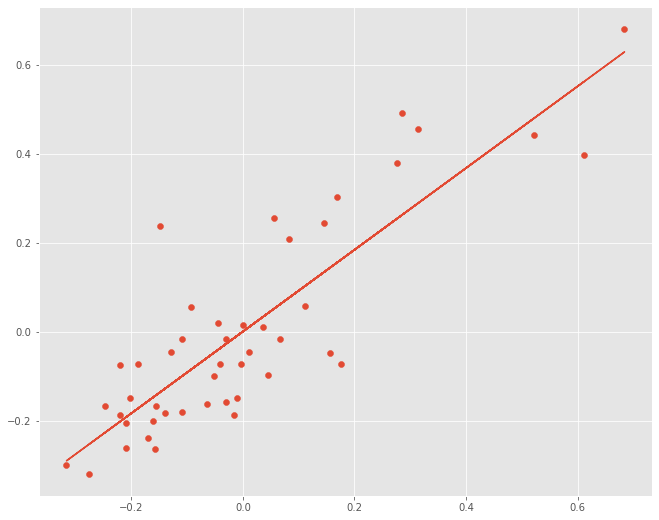

------------------------------------------------------------
Cost Function  Plot


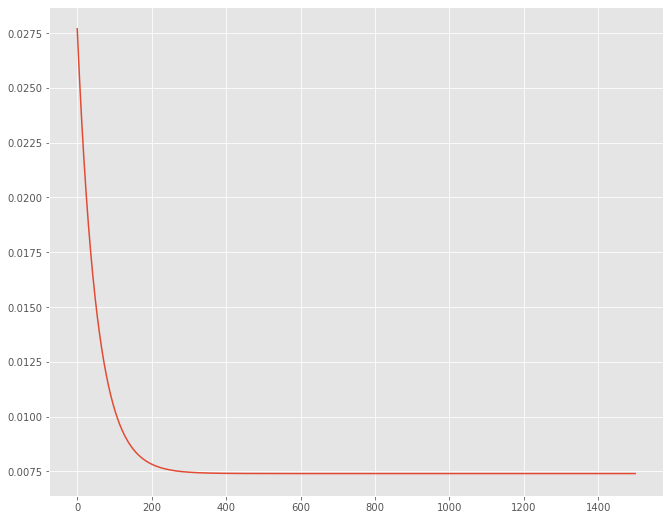

------------------------------------------------------------
Thats all the plots
Continue: n


In [0]:
#lets take it to the loop
loop(Xarr, yarr, init_params, init_costfunction, init_accuracy)

Wow! I was fascinated when I read about Linear Regression in theory and mathematics but to see it in action thats something else entirely. So from our loop we get the best fit model for our data.

In [0]:
#by the results if we keep alpha at 0.09 and iterate it through 1500 iterations we will get prediction accuracy of about 1.48%
#lets see it in action
#computing gradient descent
final_params, costs = batch_gradient(Xarr, yarr, init_params, 0.1, 1500)

Computing-----Done---


In [0]:
final_params

array([[3.42452516e-15],
       [9.19221786e-01]])

So, this is our final values for our parameters or thetas in our hypothesis.

In [0]:
#getting our model to work
model = hypothesis(Xarr, final_params)
final_costfunction = mean_squared_error(model, yarr)

In [0]:
#testing the accuracy 
model = tests(Xarr, yarr, final_params, init_costfunction, init_accuracy)

costfunction: False
accuracy: False
costfunction: 0.00740400446118652, accuracy: 1.4808008922373037


Okay, the cost function is as low as 0.00740 and accuracy is 1.480% thats pretty cool!

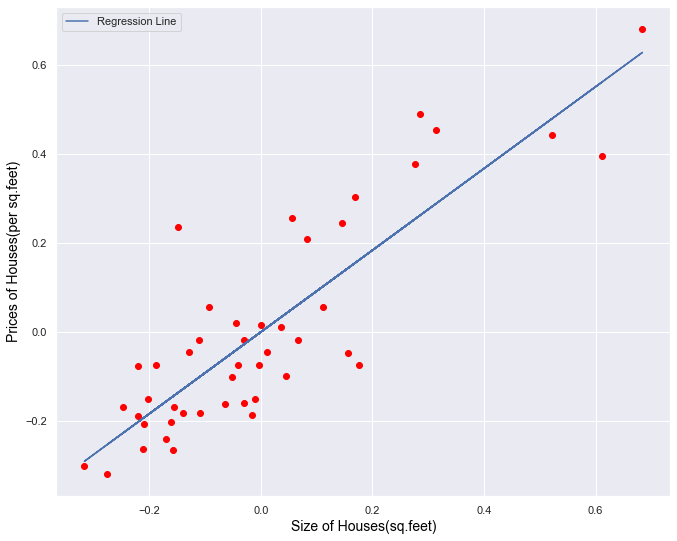

In [0]:
fig, ax = plt.subplots(figsize=(11, 9))
plt.scatter(Xarr, yarr, c='red')
plt.plot(Xarr, model, label='Regression Line')
plt.xlabel('Size of Houses(sq.feet)', fontsize=14, c='black')
plt.ylabel('Prices of Houses(per sq.feet)', fontsize=14, c='black')
plt.legend()

So, this is our model in graph! Look at that beauty! Sexy blue line!

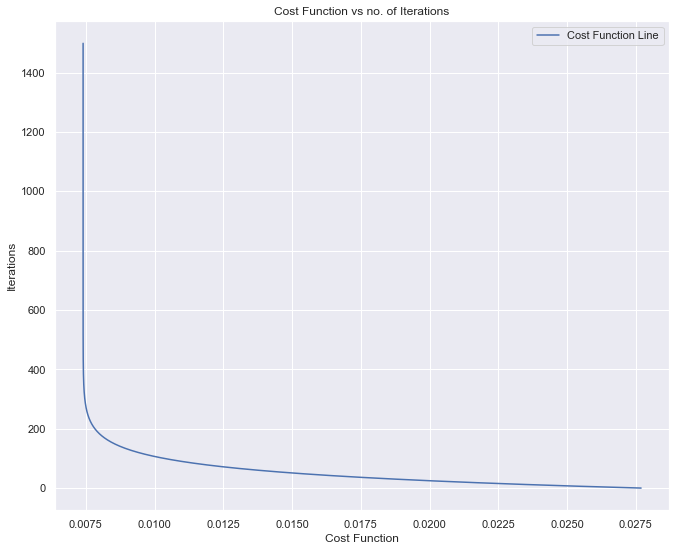

In [0]:
fig, ax = plt.subplots(figsize=(11, 9))
plt.plot(costs, [i for i in range(1500)], label='Cost Function Line')
plt.title('Cost Function vs no. of Iterations')
plt.xlabel('Cost Function')
plt.ylabel('Iterations')
plt.legend()

And this is our cost function graph. 

In [0]:
#lets laod another data
filename2 = 'popn_profit Data.csv'
df2 = pd.read_csv(filename2)
df2.head()

,popn,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Okay, lets test our model in another dataset with single feature.

In [0]:
#defining arrays
X, y = vectorize(df2['popn'], df2['profit'])

In [0]:
#initializing initial parameters
init_param2 = [0, 0]

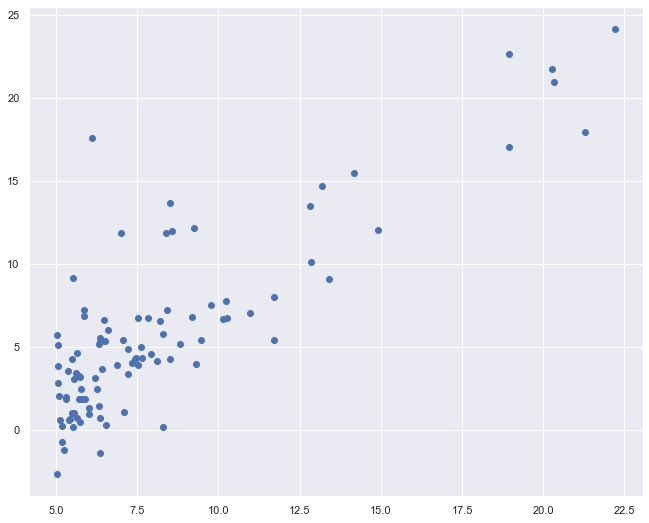

In [0]:
#graph of datset without feature scaling
fig, ax = plt.subplots(figsize=(11, 9))
plt.scatter(X, y)

The graph of my second dataset without feature scaling.

In [0]:
#model and costfunction without feature scaling
model = hypothesis(X,init_param2)
before_costfunction = mean_squared_error(model, y)
before_costfunction

32.072733877455654

I think feature scaling is really important, look at the cost function value!

In [0]:
#accuracy before feature scaling
before_accuracy = percentError(model, y)
before_accuracy

6414.546775491135

And ofcourse the accuracy is more than 100 here too! Lets get our data scaled!

In [0]:
#feature scaling
Xarr = scale_features(X)
yarr = scale_features(y)

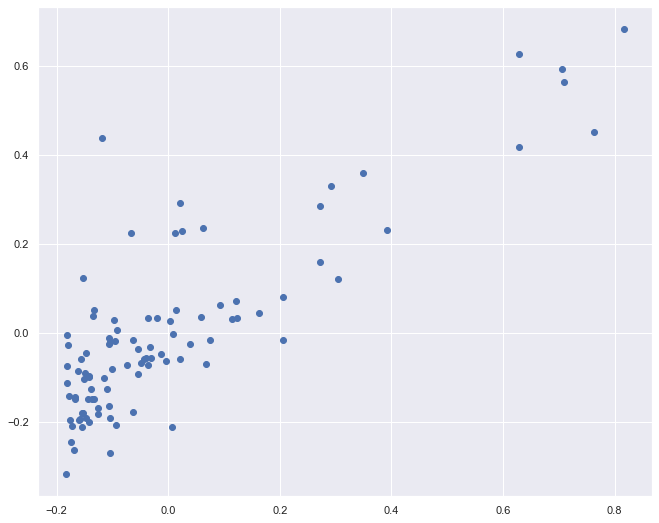

In [0]:
#our dataset after feature scaling
scatter_plot(Xarr, yarr)

So heres our scaled dataset in a scatter plot!

In [0]:
#computing model and costfunction after feature scaling
model = hypothesis(Xarr, init_param2)
init_costfunction2 = mean_squared_error(model, yarr)
init_costfunction2

0.020875993788869104

The cost function got down to 0.020 thats awesome and so did the accuracy i.e 4.17% thats cool too!

In [0]:
#accuracy after feature scaling
init_accuracy2 = percentError(model, yarr)
init_accuracy2

4.1751987577738205

In [0]:
#first trial run the batch gradient with inital parameters
params, costs = batch_gradient(Xarr, yarr, init_param2, 0.0001)

iterations: 0, costfunction: 0.020875993788869104, theta0: [-7.6113228e-21], theta1: [7.67485136e-06]
iterations: 1, costfunction: 0.02087569927363207, theta0: [-1.2361246e-20], theta1: [1.53496256e-05]
iterations: 2, costfunction: 0.020875404764313536, theta0: [-1.72828533e-20], theta1: [2.30243227e-05]
iterations: 3, costfunction: 0.0208751102609134, theta0: [-2.48941761e-20], theta1: [3.06989427e-05]
iterations: 4, costfunction: 0.020874815763431517, theta0: [-3.04452912e-20], theta1: [3.83734856e-05]
iterations: 5, costfunction: 0.020874521271867785, theta0: [-3.8285526e-20], theta1: [4.60479514e-05]
iterations: 6, costfunction: 0.020874226786222062, theta0: [-4.26348533e-20], theta1: [5.37223401e-05]
iterations: 7, costfunction: 0.02087393230649425, theta0: [-5.03034041e-20], theta1: [6.13966516e-05]
iterations: 8, costfunction: 0.020873637832684235, theta0: [-5.46527314e-20], theta1: [6.90708861e-05]
iterations: 9, costfunction: 0.020873343364791887, theta0: [-6.25501941e-20], th

In [0]:
params

array([[-9.99773002e-20],
       [ 1.15114673e-04]])

In [0]:
#testing with these new params
model = tests(Xarr, yarr, params, init_costfunction2, init_accuracy2)

costfunction: False
accuracy: False
costfunction: 0.02087157668170218, accuracy: 4.174315336340435


Lets get the loop running shall we?

Iterations: 16
Alpha: 0.0001
Computing-----Done---
Results for alpha  0.0001 for iterations 16
costfunction: False
accuracy: False
costfunction: 0.020871282255230172, accuracy: 4.174256451046034
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


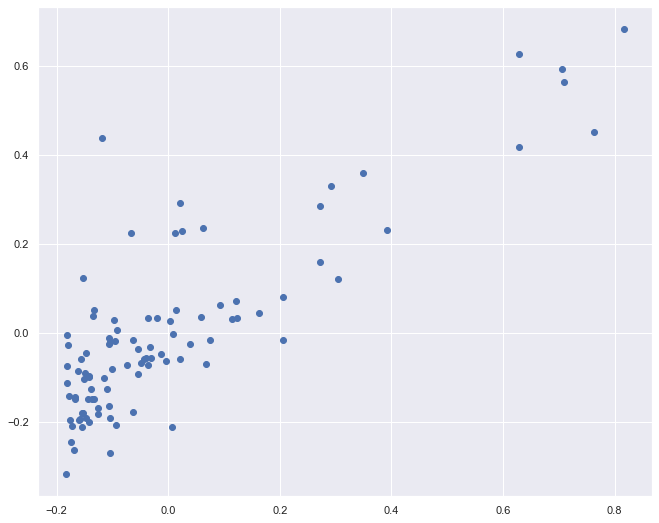

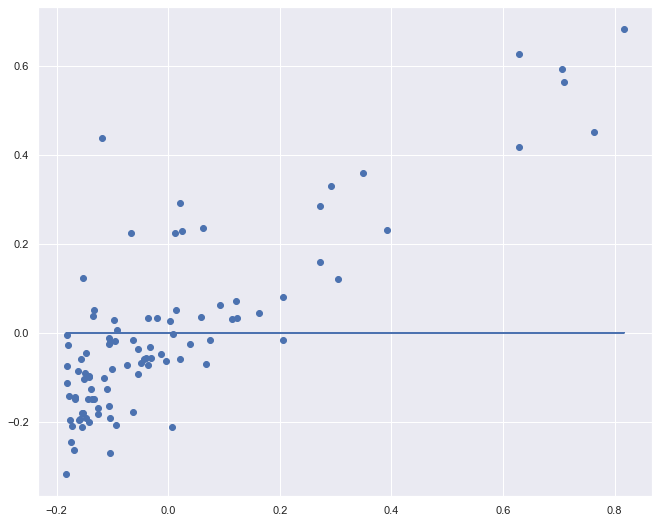

------------------------------------------------------------
Cost Function  Plot


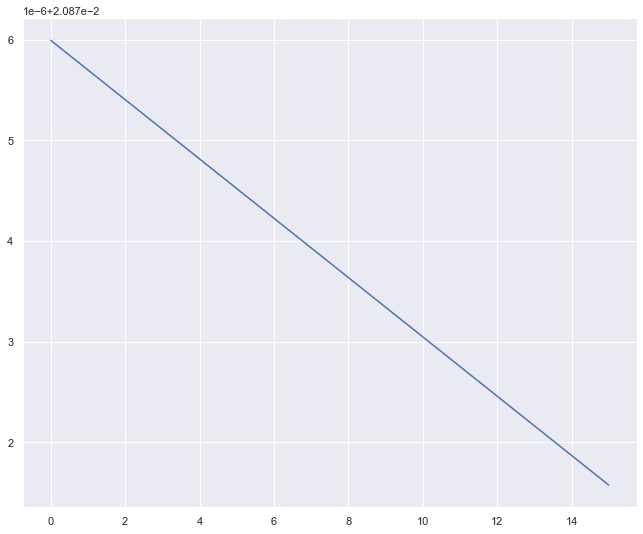

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 16
Alpha: 0.0009
Computing-----Done---
Results for alpha  0.0009 for iterations 16
costfunction: False
accuracy: False
costfunction: 0.020833642773970092, accuracy: 4.166728554794019
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


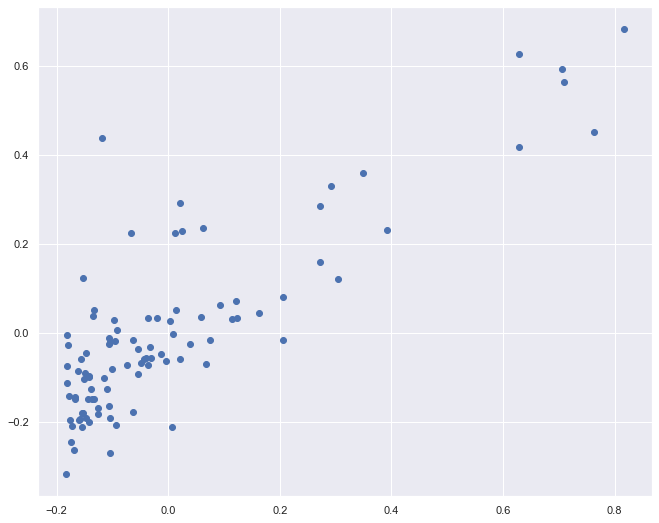

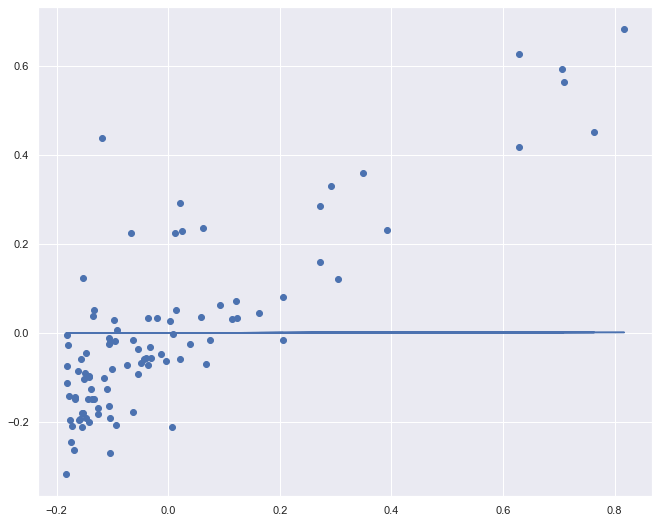

------------------------------------------------------------
Cost Function  Plot


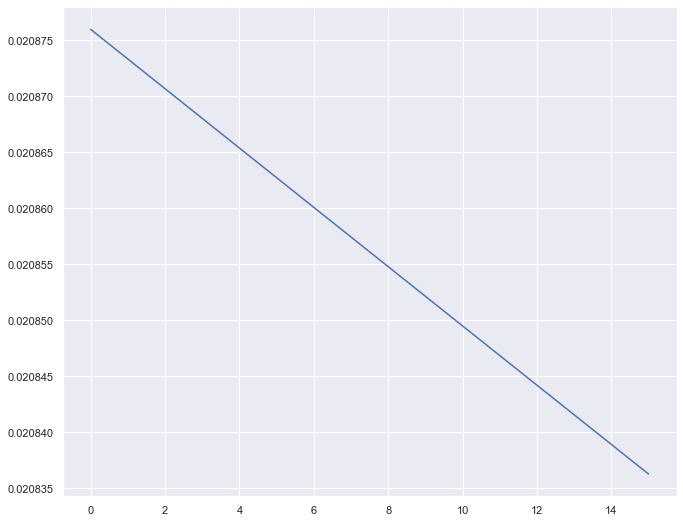

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 500
Alpha: 0.0009
Computing-----Done---
Results for alpha  0.0009 for iterations 500
costfunction: False
accuracy: False
costfunction: 0.019608772977011375, accuracy: 3.921754595402275
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


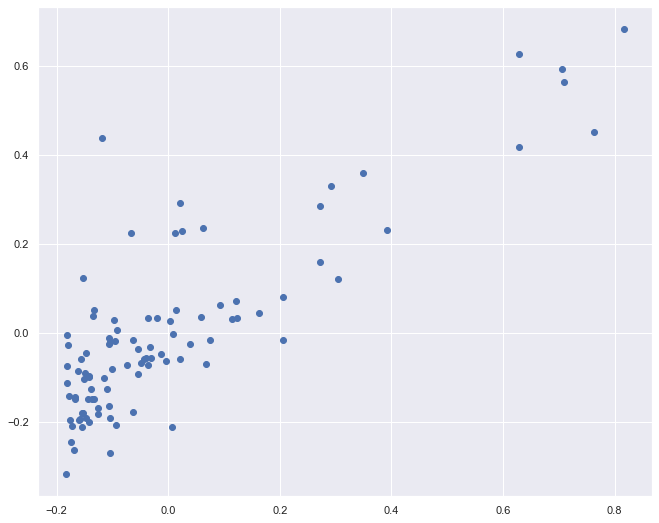

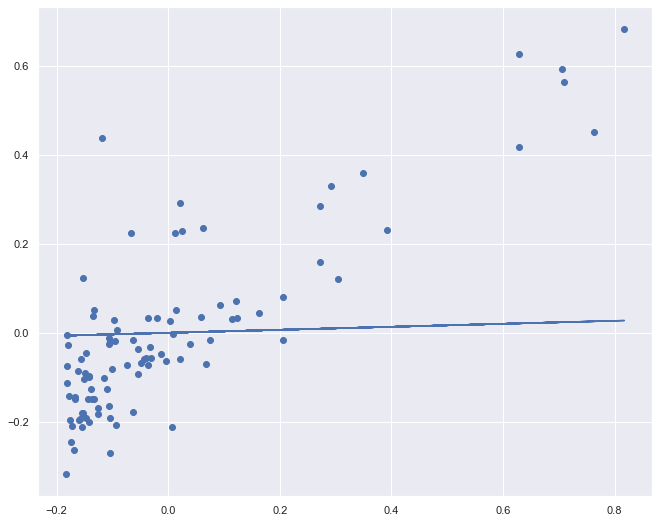

------------------------------------------------------------
Cost Function  Plot


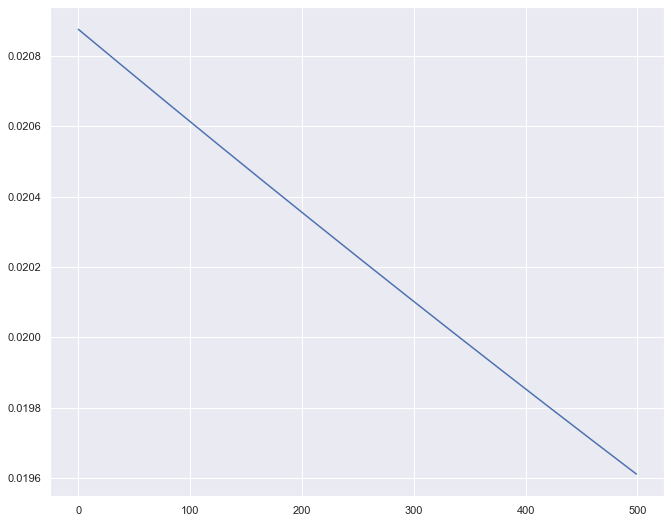

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1000
Alpha: 0.001
Computing-----Done---
Results for alpha  0.001 for iterations 1000
costfunction: False
accuracy: False
costfunction: 0.018207767729713362, accuracy: 3.6415535459426724
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


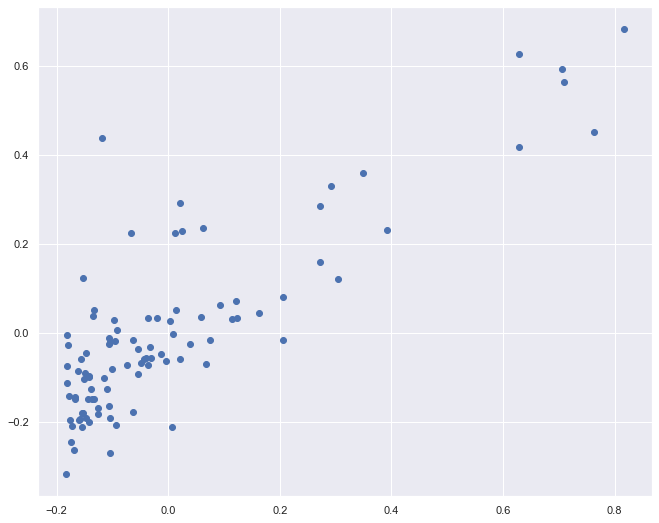

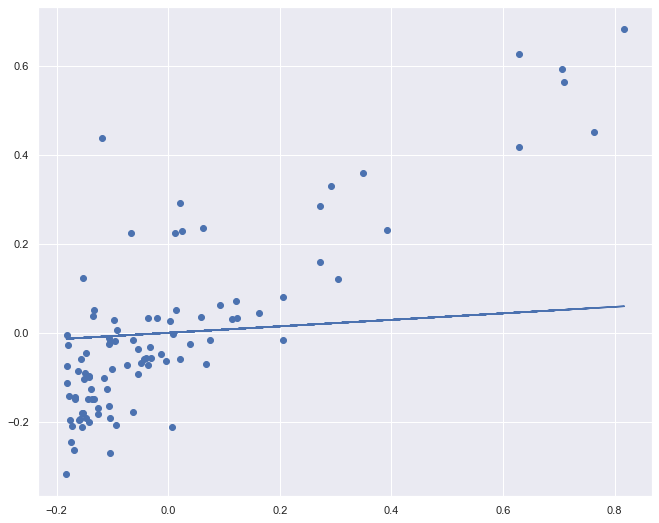

------------------------------------------------------------
Cost Function  Plot


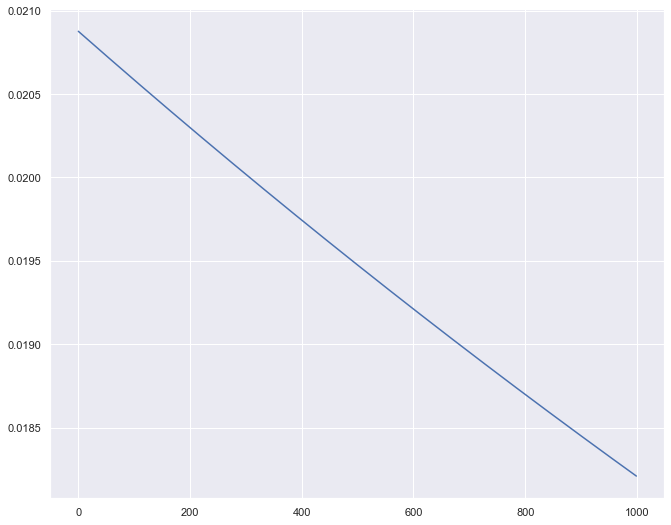

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.009
Computing-----Done---
Results for alpha  0.009 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.007191470924266344, accuracy: 1.43829418485327
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


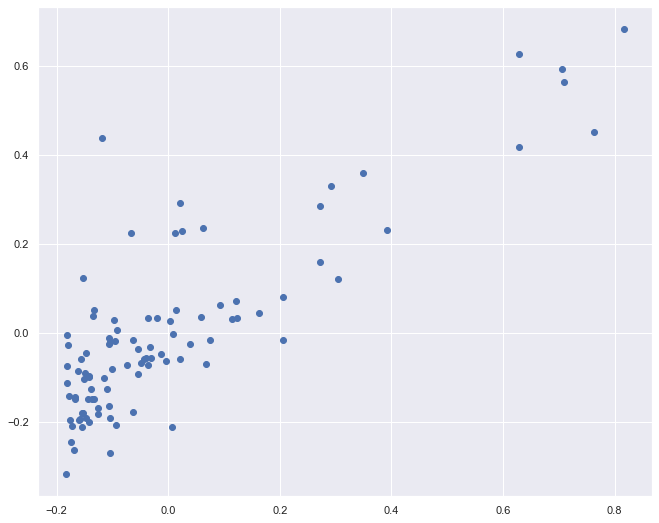

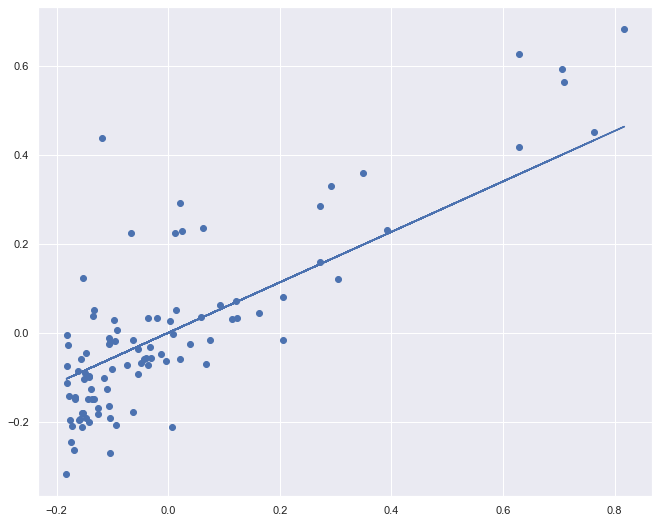

------------------------------------------------------------
Cost Function  Plot


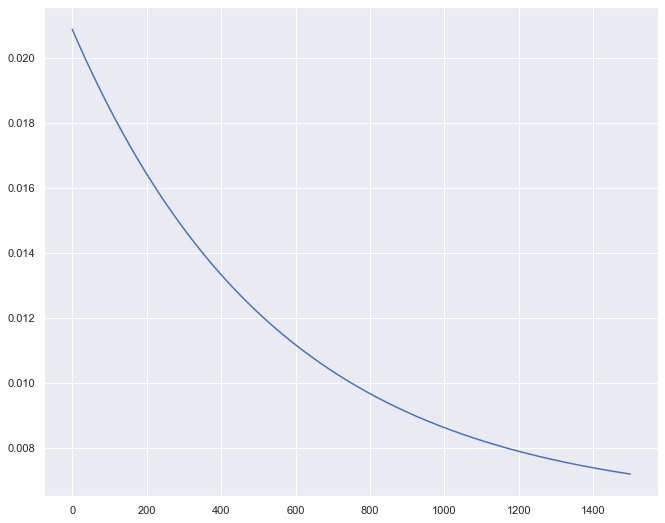

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 0.01


ValueError: invalid literal for int() with base 10: '0.01'

In [0]:
#lets get the loop on
loop(Xarr, yarr, init_param2, init_costfunction2, init_accuracy2)

Iterations: 1500
Alpha: 0.01
Computing-----Done---
Results for alpha  0.01 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.0069385434504468995, accuracy: 1.3877086900893807
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


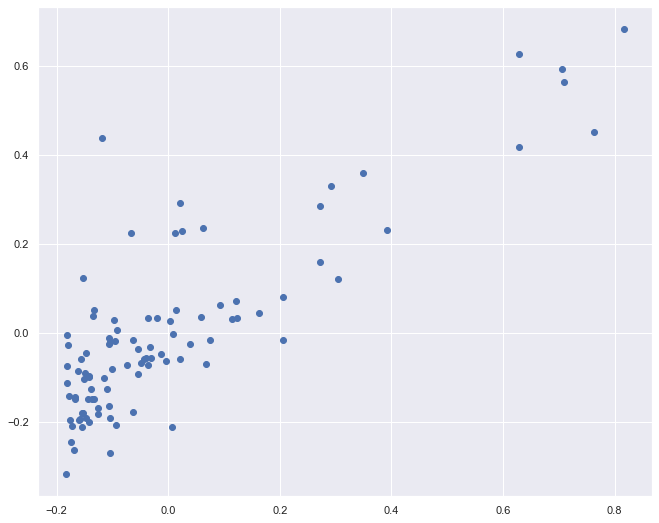

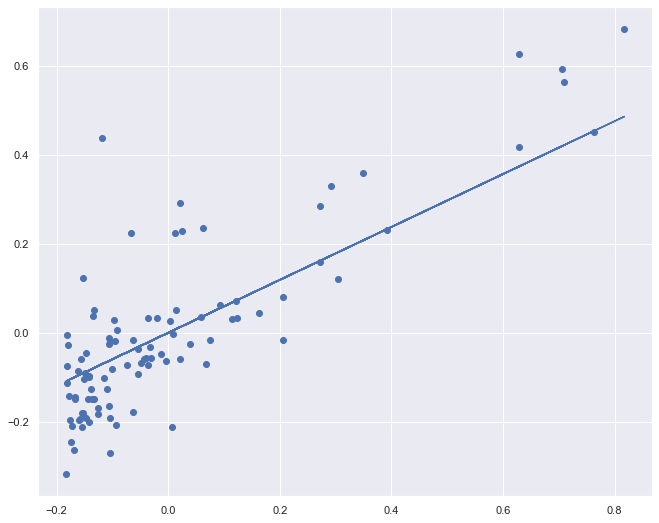

------------------------------------------------------------
Cost Function  Plot


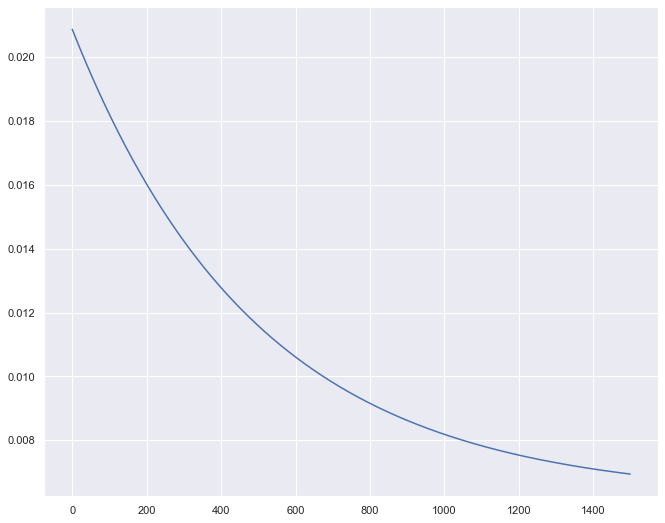

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.09
Computing-----Done---
Results for alpha  0.09 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.006220387432502668, accuracy: 1.244077486500534
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


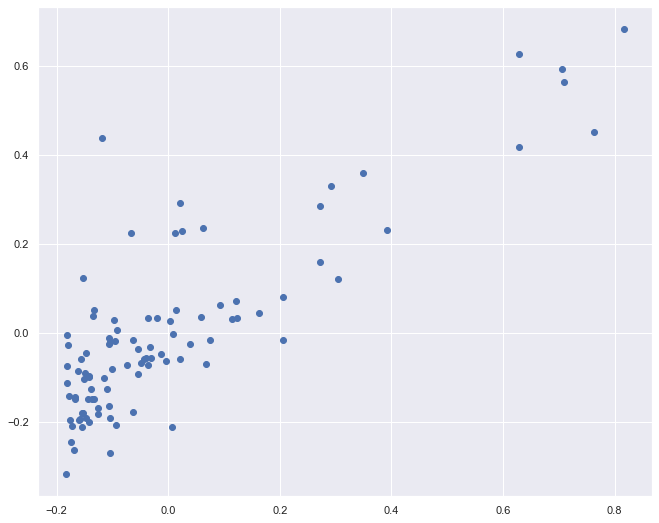

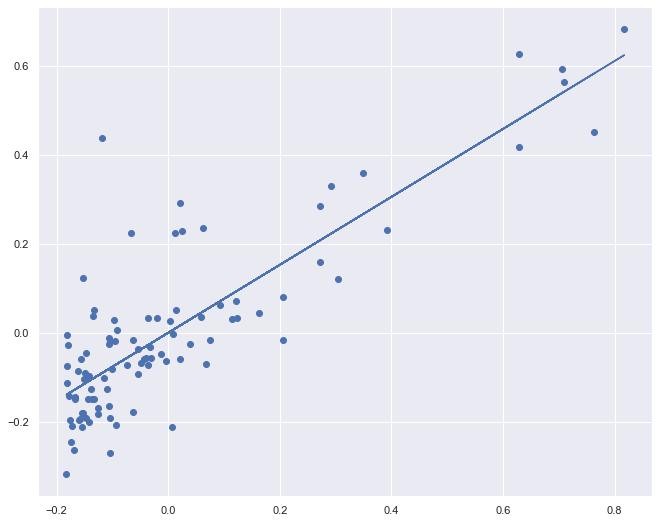

------------------------------------------------------------
Cost Function  Plot


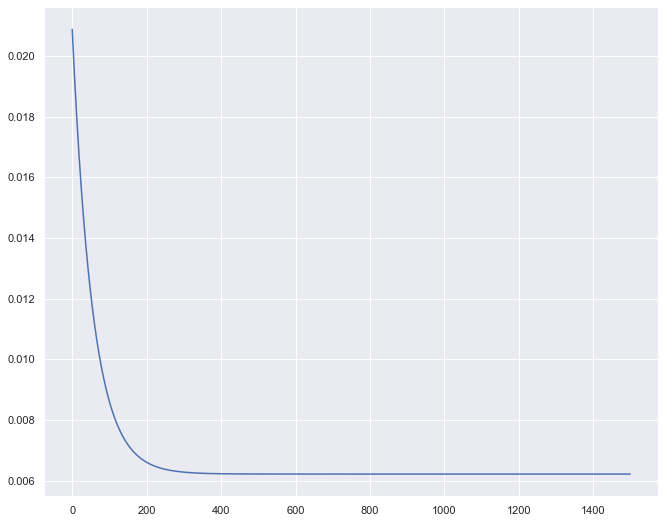

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.1
Computing-----Done---
Results for alpha  0.1 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.006220387432482297, accuracy: 1.2440774864964592
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


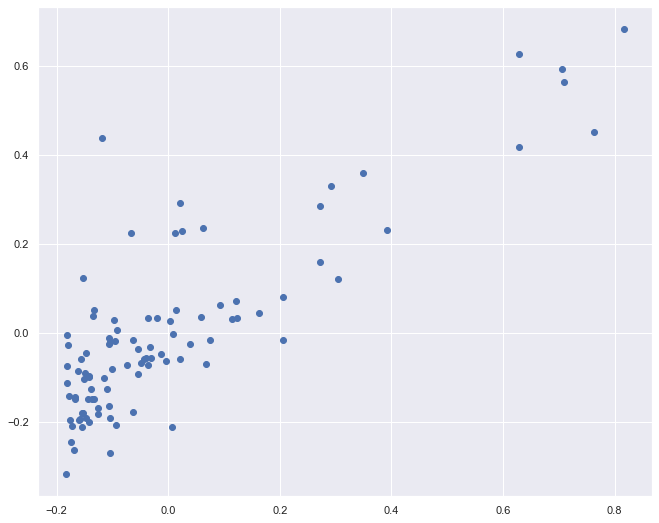

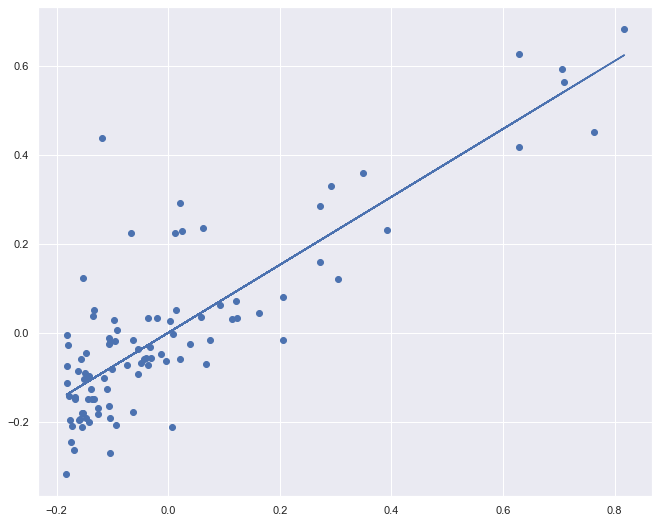

------------------------------------------------------------
Cost Function  Plot


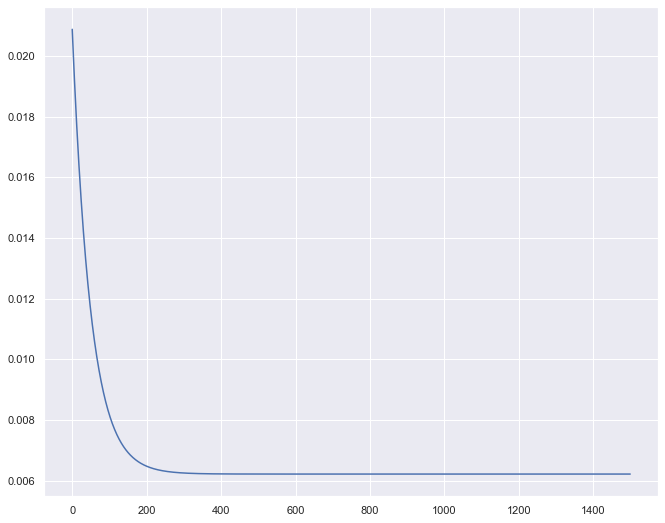

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.06
Computing-----Done---
Results for alpha  0.06 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.00622038762633311, accuracy: 1.2440775252666219
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


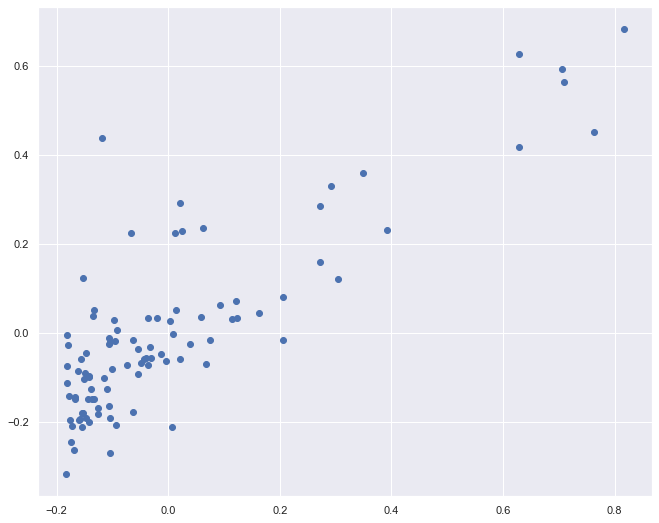

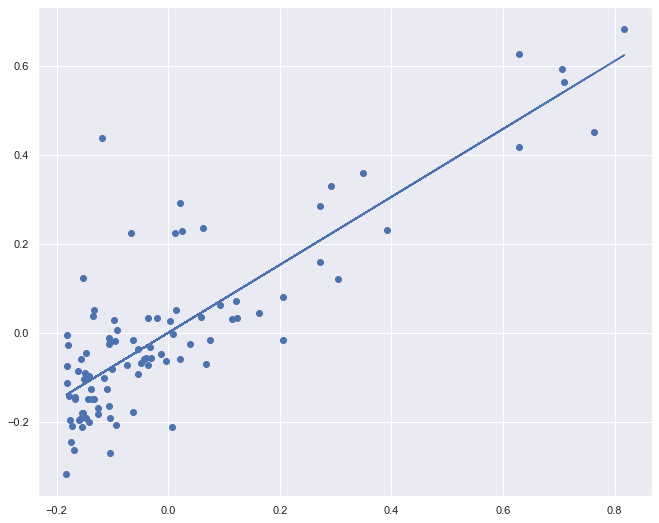

------------------------------------------------------------
Cost Function  Plot


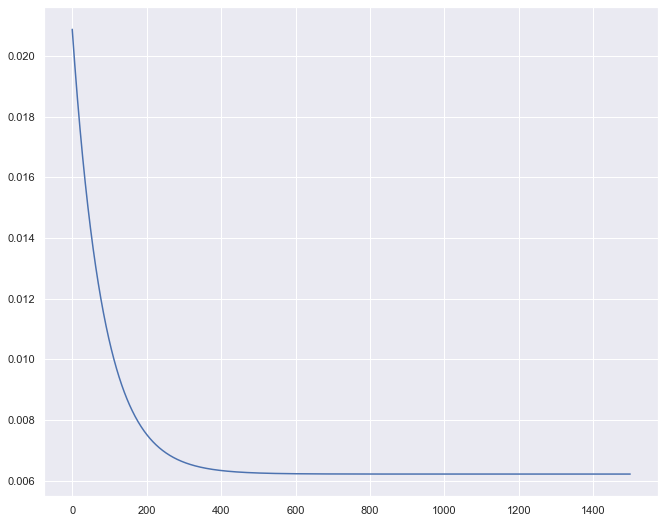

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.03
Computing-----Done---
Results for alpha  0.03 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.006222096235604858, accuracy: 1.2444192471209723
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


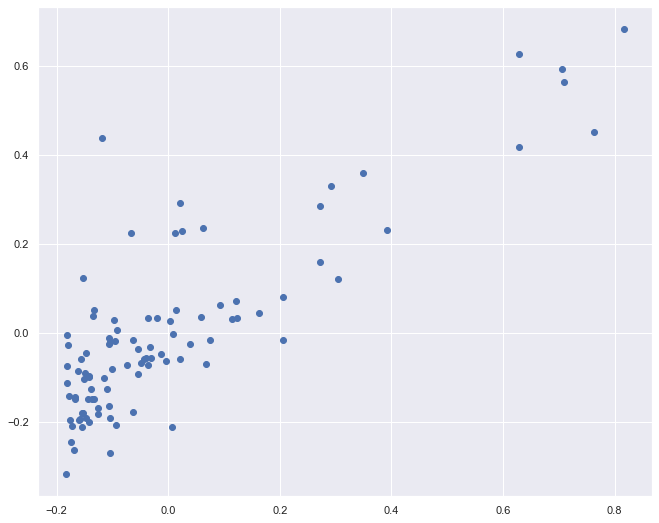

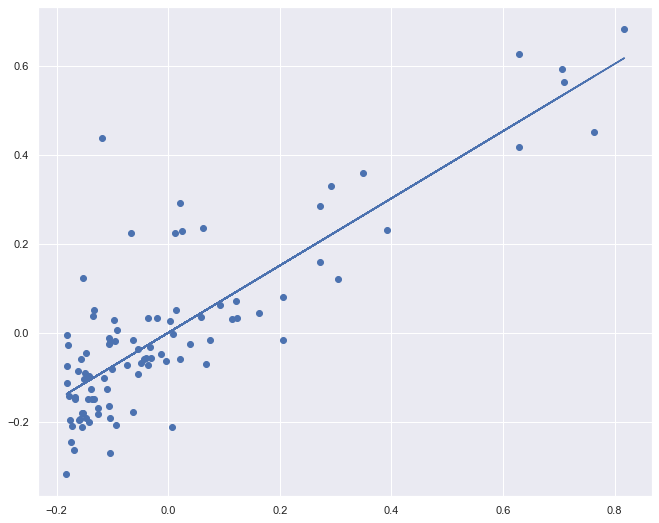

------------------------------------------------------------
Cost Function  Plot


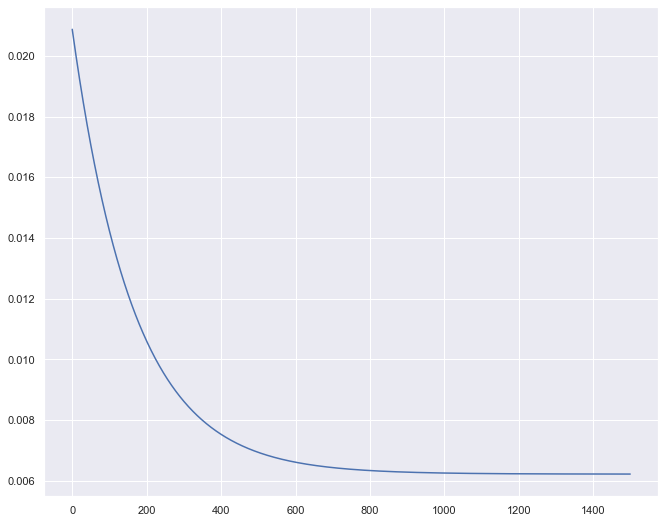

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.02
Computing-----Done---
Results for alpha  0.02 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.006255471971001832, accuracy: 1.2510943942003658
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


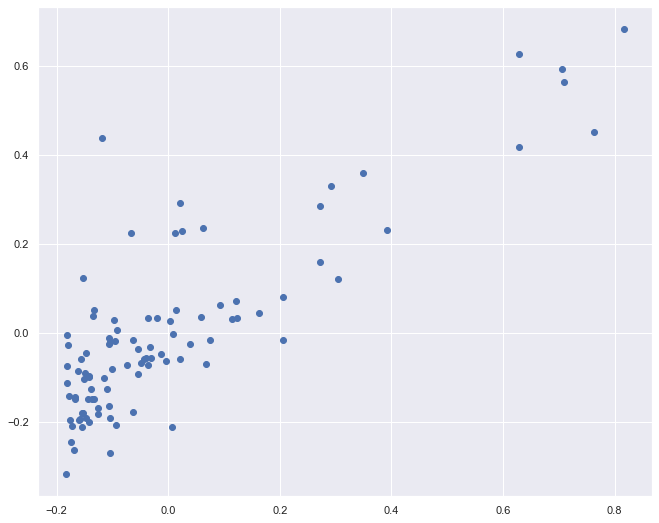

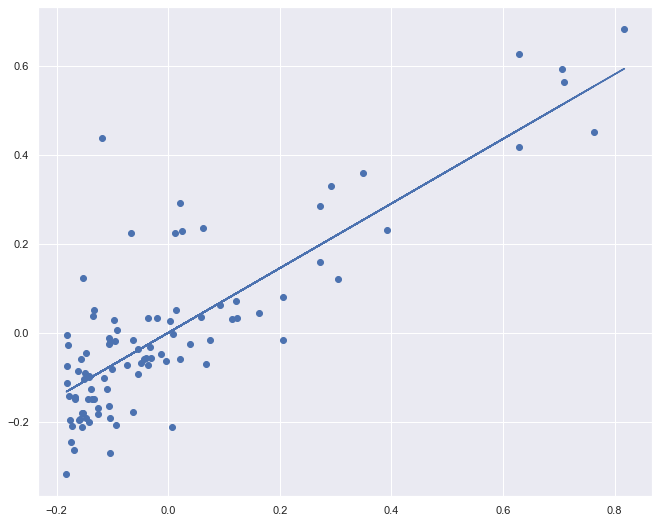

------------------------------------------------------------
Cost Function  Plot


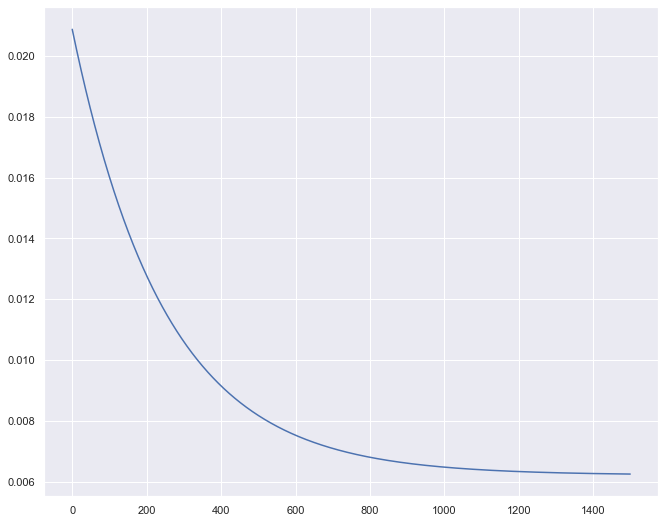

------------------------------------------------------------
Thats all the plots
Continue: y
Iterations: 1500
Alpha: 0.04
Computing-----Done---
Results for alpha  0.04 for iterations 1500
costfunction: False
accuracy: False
costfunction: 0.006220470407034548, accuracy: 1.2440940814069104
------------------------------------------------------------
Scatter Plot
------------------------------------------------------------
Model Plot


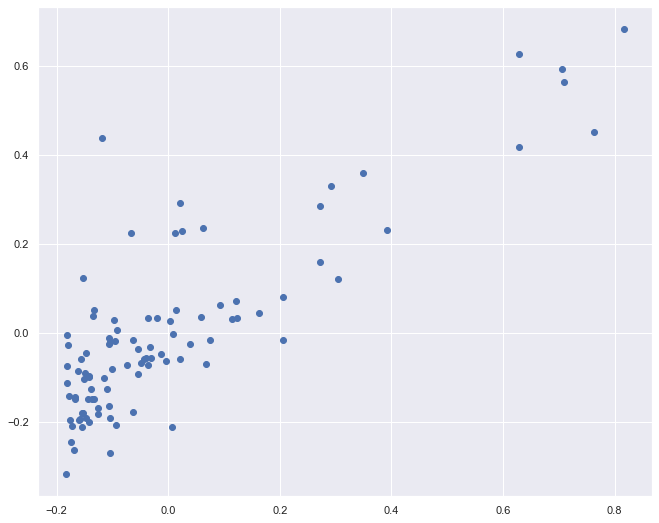

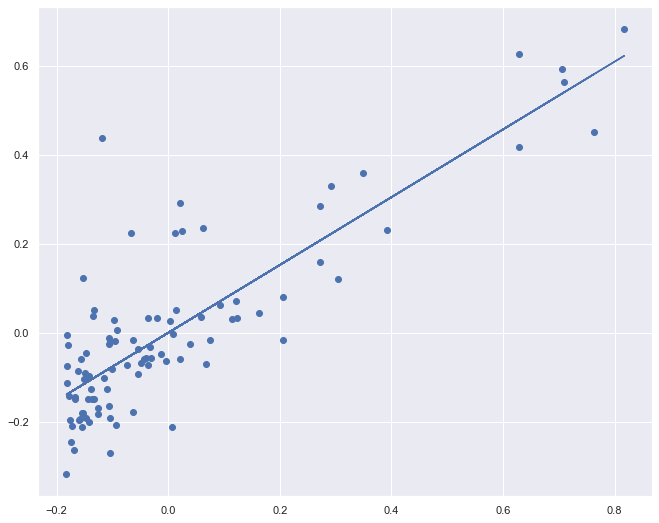

------------------------------------------------------------
Cost Function  Plot


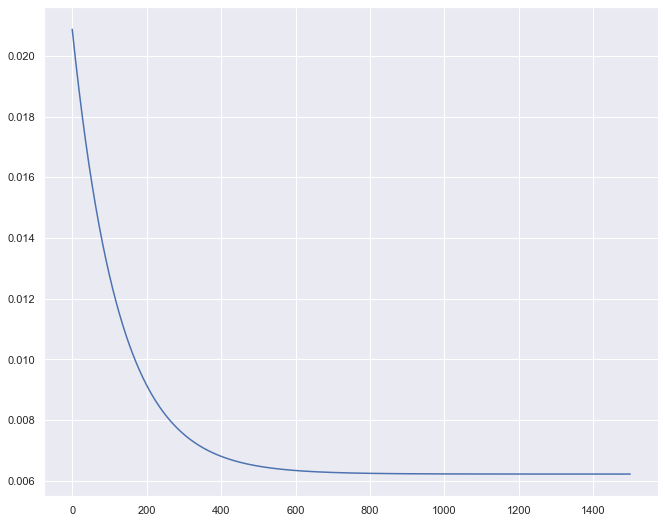

------------------------------------------------------------
Thats all the plots
Continue: n


In [0]:
loop(Xarr, yarr, init_param2, init_costfunction2, init_accuracy2)

In [0]:
#alpha 0.04, iterations 1500
final_params2, costs2 = batch_gradient(Xarr, yarr, init_param2, 0.04, 1500)

Computing-----Done---


In [0]:
#computing model and cost function
model = hypothesis(Xarr, final_params2)
costfunction = mean_squared_error(model, yarr)
costfunction

0.006220470407034548

In [0]:
#accuracy check
accuracy = percentError(model, yarr)
accuracy

1.2440940814069104

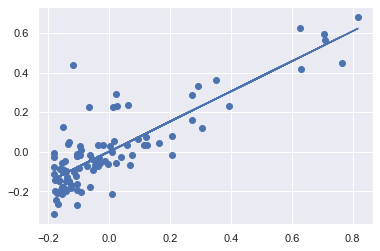

In [0]:
plt.scatter(Xarr,yarr)
plt.plot(Xarr, model)

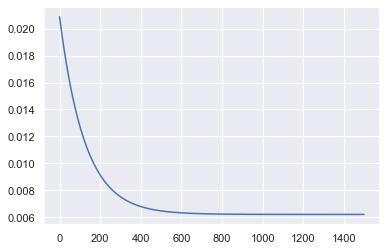

In [0]:
plt.plot(costs2)

## Conclusion
My model works perfectly for both datasets. For both datas the accuracy of it is in the range of 1.3 to 1.5% which is very sweet! 